# เรียงลำดับหุ้นปันผล ใน SET100 VS SETHD

In [20]:
#!pip install starfishX --upgrade
import starfishX as sx

#!pip install mplcyberpunk
import mplcyberpunk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("cyberpunk")

In [2]:
df = sx.getDividendYieldOfIndex(sx.indexMarket.SET50)
set50 = df.sort_values('dividendYield',ascending=False).head(10)
set50.sum()

dividendYield    59.55
dtype: float64

In [3]:
set50

dividendYield
symbol               
PTTGC            8.96
TISCO            7.49
IRPC             7.19
SCC              5.76
PTT              5.76
LH               5.62
TU               5.08
SAWAD            4.62
DTAC             4.57
TOP              4.50

In [4]:
df = sx.getDividendYieldOfIndex(sx.indexMarket.SETHD)
sethd = df.sort_values('dividendYield',ascending=False).head(10)
sethd.sum()

dividendYield    63.08
dtype: float64

In [5]:
sethd

dividendYield
symbol               
TCAP             7.55
TISCO            7.49
BCH              6.86
SPALI            6.27
TASCO            6.18
HANA             5.88
SCC              5.76
PTT              5.76
CHG              5.71
LH               5.62

Text(0.5, 1.0, 'Dividend Yield SET50 & SETHD')

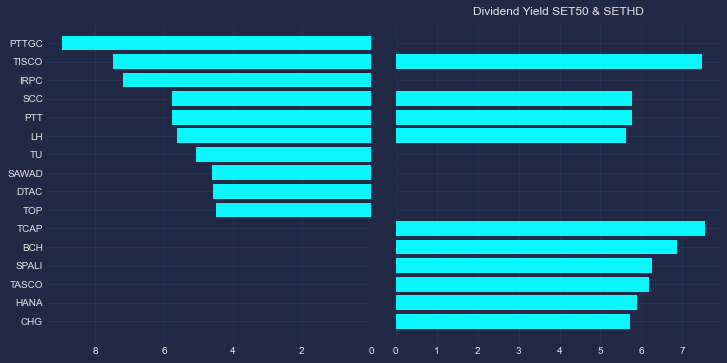

In [9]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

set50x = set50.index
set50dividendYield = set50.dividendYield
ax[0].barh(y=set50x,width=set50dividendYield)

ax[0].invert_xaxis()
ax[0].invert_yaxis()


sethdx = sethd.index
sethddividendYield = sethd.dividendYield
ax[1].barh(y=sethdx,width=sethddividendYield)
plt.title('Dividend Yield SET50 & SETHD')

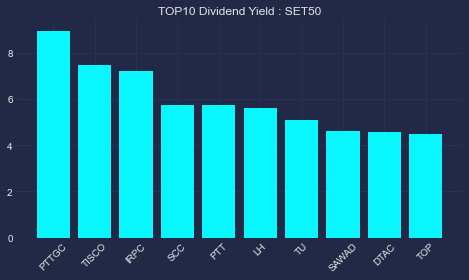

In [10]:
plt.figure(figsize=(8, 4))
plt.bar(x=set50x,height=set50dividendYield)
plt.xticks(rotation=45)
plt.title('TOP10 Dividend Yield : SET50')
plt.show()

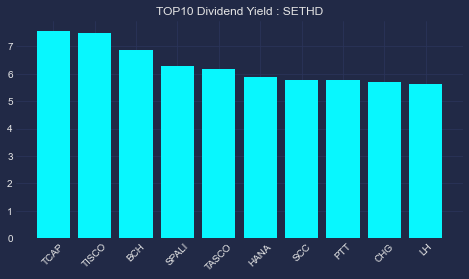

In [11]:
plt.figure(figsize=(8, 4))
plt.bar(x=sethdx,height=sethddividendYield)
plt.xticks(rotation=45)
plt.title('TOP10 Dividend Yield : SETHD')
plt.show()

In [12]:
set50['class_'] = 'set50'
sethd['class_'] = 'sethd'

In [17]:
not_set50 = []
for i in sethd.index:
  k = False  
  if(not (i in set50.index)): #ถ้าอยู่ใน sethd แต่ไม่ได้อยู่ใน set50
    #print(sethd[sethd.index==i])
    k = True
  not_set50.append(k)

sethd['not_set50'] = not_set50
sethd

dividendYield class_  not_set50
symbol                                 
TCAP             7.55  sethd       True
TISCO            7.49  sethd      False
BCH              6.86  sethd       True
SPALI            6.27  sethd       True
TASCO            6.18  sethd       True
HANA             5.88  sethd       True
SCC              5.76  sethd      False
PTT              5.76  sethd      False
CHG              5.71  sethd       True
LH               5.62  sethd      False

In [18]:
sethdExcludeSet50 = sethd[sethd['not_set50']==True][['dividendYield','class_']]
sethdExcludeSet50

dividendYield class_
symbol                      
TCAP             7.55  sethd
BCH              6.86  sethd
SPALI            6.27  sethd
TASCO            6.18  sethd
HANA             5.88  sethd
CHG              5.71  sethd

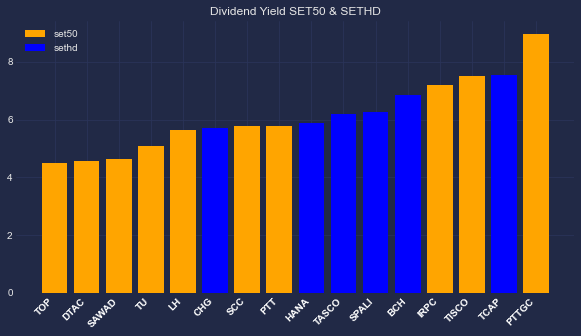

In [21]:
plt.figure(figsize=(10, 5))  # width:20, height:3

result = pd.concat([set50,sethdExcludeSet50])
result = result.sort_values('dividendYield')

result['no'] = np.arange(0,len(result))
result['color'] = np.where(result['class_']=='set50','orange','blue')

p = result[result.class_=='set50'] 
k = result[result.class_=='sethd']
plt.bar(x=p.no,height=p.dividendYield,
             color=p.color,label='set50')

ax = plt.bar(x=k.no,height=k.dividendYield,
             color=k.color,label='sethd')


plt.xticks(rotation=45)
plt.title('Dividend Yield SET50 & SETHD')
plt.legend()

# use the plt.xticks function to custom labels
plt.xticks(result.no, result.index, 
           color='white', 
           rotation=45, fontweight='bold', 
           fontsize='10', horizontalalignment='right')
    
plt.show()

In [22]:
df = result[['dividendYield','class_']]
df.sort_values('dividendYield',ascending=False)

dividendYield class_
symbol                      
PTTGC            8.96  set50
TCAP             7.55  sethd
TISCO            7.49  set50
IRPC             7.19  set50
BCH              6.86  sethd
SPALI            6.27  sethd
TASCO            6.18  sethd
HANA             5.88  sethd
SCC              5.76  set50
PTT              5.76  set50
CHG              5.71  sethd
LH               5.62  set50
TU               5.08  set50
SAWAD            4.62  set50
DTAC             4.57  set50
TOP              4.50  set50